<a href="https://colab.research.google.com/github/anjanpa/Natural-Language-Processing/blob/master/Natural_language_processing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SENTIMENT ANALYSIS

# 1.Problem
The problem is about sentiment analysis and finding whether the given sentiment is positive or not.

# 2. Data 
The data is taken from tensorflow datasets .Go through the link to get its full details.
https://www.tensorflow.org/datasets/catalog/glue#gluesst2

# 3.Evaluation 
The accuracy is measured using score method.

# 4.Features 
The dataset consists of train ,test and validation dataset.
The data contains sentences(i.e. opinions) and labels (which is sentiment that tells whether it is positive or not)



## Getting our tools ready

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 


### Getting our data ready

In [ ]:
 dataset,info=tfds.load("glue/sst2",with_info=True)
 train,validation=dataset["train"],dataset["validation"]

In [ ]:
info

tfds.core.DatasetInfo(
    name='glue',
    version=1.0.0,
    description='GLUE, the General Language Understanding Evaluation benchmark
(https://gluebenchmark.com/) is a collection of resources for training,
evaluating, and analyzing natural language understanding systems.

            The Stanford Sentiment Treebank consists of sentences from movie reviews and
            human annotations of their sentiment. The task is to predict the sentiment of a
            given sentence. We use the two-way (positive/negative) class split, and use only
            sentence-level labels.',
    homepage='https://nlp.stanford.edu/sentiment/index.html',
    features=FeaturesDict({
        'idx': tf.int32,
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'sentence': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=70042,
    splits={
        'test': 1821,
        'train': 67349,
        'validation': 872,
    },
    supervised_keys=None,
    citation="""@

## EXPLORATORY DATA ANALYSIS

In [ ]:
## Take a look at few sentences and their labels
for data in train.take(3):
  sentence=data["sentence"]
  label=data["label"]
  print("Sentence=",sentence,"\n")
  print("Label",label.numpy(),"\n")

  

Sentence= tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string) 

Label 0 

Sentence= tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string) 

Label 0 

Sentence= tf.Tensor(b'company once again dazzle and delight us ', shape=(), dtype=string) 

Label 1 



In [ ]:
review="hari"
str(tf.constant(review).numpy())

"b'hari'"

In [ ]:
for example in train.take(1):
  print("Type",type(example),"\n")
  print(example["sentence"])
  print(example["sentence"].numpy(),type(example["sentence"].numpy()))
  print(str(example["sentence"].numpy()),type(str(example["sentence"].numpy())))


Type <class 'dict'> 

tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
b'for the uninitiated plays better on video with the sound ' <class 'bytes'>
b'for the uninitiated plays better on video with the sound ' <class 'str'>


In [ ]:
## Creating training and test sets reviews and labels list
train_reviews=[]
train_label=[]

validation_label=[]
validation_reviews=[]

## For train set
for data in train.take(-1):
  reviews,label=data["sentence"],data["label"]
  train_reviews.append(str(reviews.numpy()))
  train_label.append(label)

## For validation set
for valid in validation.take(-1):# Takes the whole data
  reviews,label=valid["sentence"],valid["label"]
  validation_reviews.append(str(reviews.numpy()))
  validation_label.append(label)

## Check the no of valid data and train data
len(train_reviews),len(train_label),len(validation_reviews),len(validation_label)


(67349, 67349, 872, 872)

# 5. Building a tokenizer and padding the sequences


In [ ]:
## Providing variables size
vocab_size=60000
OOV="<OOV>"
max_length=55
pad_type="pre"
trunc_type="pre"
embedding_dim=16

####### ** TRAINING DATA **######
## Making a tokenizer
tokenizer=Tokenizer(num_words=vocab_size,oov_token=OOV)

## Fit the tokenizer to the training data
tokenizer.fit_on_texts(train_reviews)

## Make it to sequences
train_sequence=tokenizer.texts_to_sequences(train_reviews)
train_padded=pad_sequences(train_sequence,maxlen=max_length,truncating=trunc_type,padding=pad_type)

######### ** VALIDATION DATA ** ############
## make it for validation data
valid_sequences=tokenizer.texts_to_sequences(validation_reviews)
valid_padded=pad_sequences(valid_sequences,maxlen=max_length)

## Creating final labels
train_final_label=np.array(train_label)
valid_final_label=np.array(validation_label)



# DEVELOPING THE MODELS

### Training using simple embedding layers

In [ ]:
## Creating models
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.Conv1D(64,8,activation="relu"),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)), 
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                           tf.keras.layers.Dropout(.5),
                           tf.keras.layers.Dense(16,"relu"),
                           tf.keras.layers.Dense(1,"sigmoid")
])

## Compile the model
model.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam()
              )


In [ ]:
## Fitting the model
history=model.fit(train_padded,train_final_label,epochs=10,batch_size=100,validation_data=(valid_padded,valid_final_label),
                  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3))

Epoch 1/10
674/674 [==============================] - 37s 55ms/step - loss: 0.3881 - accuracy: 0.8160 - val_loss: 0.4574 - val_accuracy: 0.8016
Epoch 2/10
674/674 [==============================] - 35s 53ms/step - loss: 0.1810 - accuracy: 0.9361 - val_loss: 0.4760 - val_accuracy: 0.8245
Epoch 3/10
674/674 [==============================] - 36s 53ms/step - loss: 0.1168 - accuracy: 0.9608 - val_loss: 0.4831 - val_accuracy: 0.8165
Epoch 4/10
674/674 [==============================] - 35s 52ms/step - loss: 0.0824 - accuracy: 0.9710 - val_loss: 0.5463 - val_accuracy: 0.8165
Epoch 5/10
674/674 [==============================] - 35s 52ms/step - loss: 0.0611 - accuracy: 0.9780 - val_loss: 0.5886 - val_accuracy: 0.8131


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 55, 16)            67200     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 67,217
Trainable params: 67,217
Non-trainable params: 0
_________________________________________________________________


### Training using convolutions layers


In [ ]:
## Creating models
model_conv=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.Conv1D(24,6),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(1,"sigmoid")
])

## Compile the model
model_conv.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(1)
              )


In [ ]:
## Fitting the model
history_conv=model_conv.fit(train_padded,train_final_label,epochs=10,validation_data=(valid_padded,valid_final_label),
                            )

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 21.2039 - accuracy: 0.5954 - val_loss: 0.7949 - val_accuracy: 0.6479
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.5379 - accuracy: 0.7639 - val_loss: 0.8019 - val_accuracy: 0.6812
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 224.1170 - accuracy: 0.7308 - val_loss: 421.9542 - val_accuracy: 0.6548
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 63.0254 - accuracy: 0.7412 - val_loss: 85.6471 - val_accuracy: 0.4599
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 8.0537 - accuracy: 0.8123 - val_loss: 12.7193 - val_accuracy: 0.7099
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 6.2572 - accuracy: 0.8358 - val_loss: 20.3264 - val_accuracy: 0.6927
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 4.5605 - accuracy: 0.8504 - val_loss: 43.8830 - val_accuracy: 0.7

In [ ]:
model_conv.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 55, 16)            67200     
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 50, 24)            2328      
_________________________________________________________________
global_average_pooling1d_17  (None, 24)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 25        
Total params: 69,553
Trainable params: 69,553
Non-trainable params: 0
_________________________________________________________________


### Training using LSTM and GRU

In [ ]:

## Creating models
model_lstm=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                           tf.keras.layers.Dense(1,"sigmoid")
])

## Compile the model
model_lstm.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(1)
              )

In [ ]:
## Fitting the model
history_lstm=model_lstm.fit(train_padded,train_final_label,epochs=10,validation_data=(valid_padded,valid_final_label),
                            callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
                            )

Epoch 1/10
313/313 [==============================] - 20s 64ms/step - loss: 0.9346 - accuracy: 0.5172 - val_loss: 0.8922 - val_accuracy: 0.5092
Epoch 2/10
313/313 [==============================] - 19s 59ms/step - loss: 0.9197 - accuracy: 0.5195 - val_loss: 1.0611 - val_accuracy: 0.4679
Epoch 3/10
313/313 [==============================] - 18s 59ms/step - loss: 0.9374 - accuracy: 0.5079 - val_loss: 1.2146 - val_accuracy: 0.4897
Epoch 4/10
313/313 [==============================] - 19s 59ms/step - loss: 0.8428 - accuracy: 0.5179 - val_loss: 1.0982 - val_accuracy: 0.5310
Epoch 5/10
313/313 [==============================] - 18s 59ms/step - loss: 0.8209 - accuracy: 0.5126 - val_loss: 1.2741 - val_accuracy: 0.5172
Epoch 6/10
313/313 [==============================] - 18s 59ms/step - loss: 0.8574 - accuracy: 0.5194 - val_loss: 1.0253 - val_accuracy: 0.4885
Epoch 7/10
313/313 [==============================] - 18s 59ms/step - loss: 0.8770 - accuracy: 0.5099 - val_loss: 1.0225 - val_accuracy:

In [ ]:
## Creating models from GRU
model_gru=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                           tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                           
                           tf.keras.layers.Dense(1,"sigmoid")
])

## Compile the model
model_gru.compile(loss="binary_crossentropy",
              metrics=["accuracy"],
              optimizer=tf.keras.optimizers.Adam(1)
              )

In [ ]:
## Fitting the model
history_gru=model_gru.fit(train_padded,train_final_label,epochs=10,validation_data=(valid_padded,valid_final_label),
                            callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)
                            )

Epoch 1/10
313/313 [==============================] - 12s 38ms/step - loss: 2.5355 - accuracy: 0.5128 - val_loss: 2.4616 - val_accuracy: 0.4885
Epoch 2/10
313/313 [==============================] - 11s 36ms/step - loss: 2.0710 - accuracy: 0.5193 - val_loss: 3.4158 - val_accuracy: 0.4771
Epoch 3/10
313/313 [==============================] - 11s 37ms/step - loss: 2.4520 - accuracy: 0.5110 - val_loss: 4.1121 - val_accuracy: 0.4966
Epoch 4/10
313/313 [==============================] - 11s 36ms/step - loss: 2.1390 - accuracy: 0.5196 - val_loss: 2.7978 - val_accuracy: 0.5115
Epoch 5/10
313/313 [==============================] - 11s 36ms/step - loss: 2.4372 - accuracy: 0.5188 - val_loss: 5.2721 - val_accuracy: 0.4805
Epoch 6/10
313/313 [==============================] - 11s 37ms/step - loss: 2.2288 - accuracy: 0.5216 - val_loss: 6.1722 - val_accuracy: 0.4805
Epoch 7/10
313/313 [==============================] - 12s 37ms/step - loss: 2.3626 - accuracy: 0.5142 - val_loss: 3.3345 - val_accuracy:

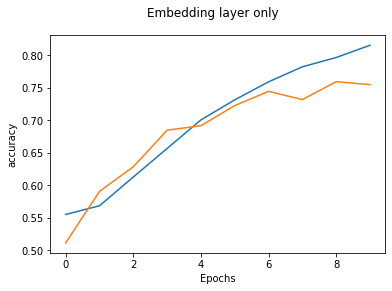

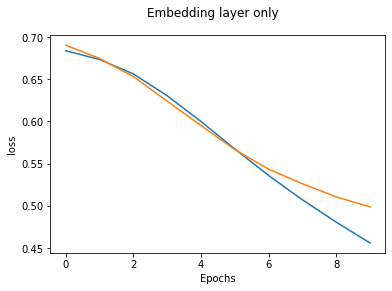

In [ ]:
# Plotting the graph of outputs
def plot_graph(history,string,title):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.suptitle(title)
  plt.show()

plot_graph(history,"accuracy",title="Embedding layer only")

  


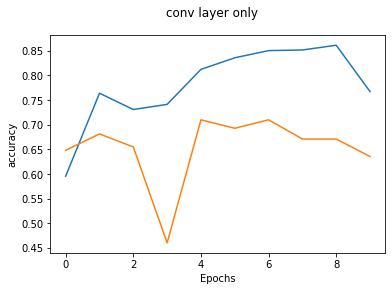

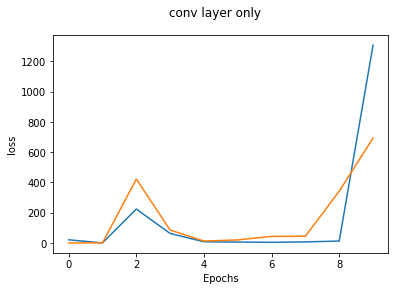

In [ ]:
plot_graph(history_conv,"accuracy",title="conv layer only")
plot_graph(history_conv,"loss",title="conv layer only")
  

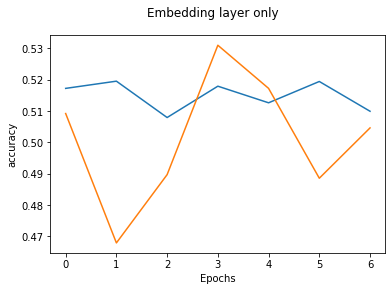

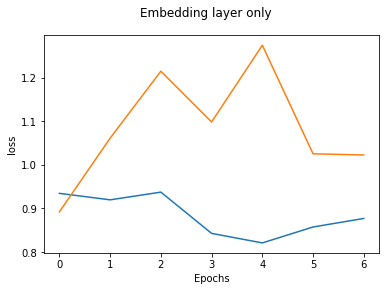

In [ ]:
plot_graph(history_lstm,"accuracy",title="Embedding layer only")
plot_graph(history_lstm,"loss",title="Embedding layer only")
  

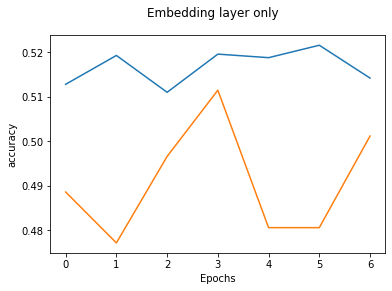

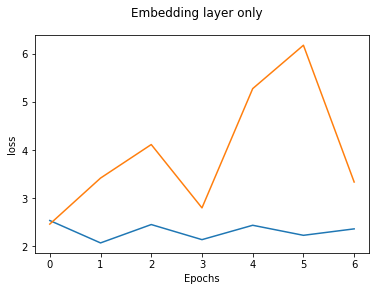

In [ ]:
plot_graph(history_gru,"accuracy",title="Embedding layer only")
plot_graph(history_gru,"loss",title="Embedding layer only")
  

# Predicting the model

In [ ]:
### Predict the model
reviews=["The movie is not as expected","The  movie was great in overall"]

def predict_review(model, reviews):
  # Create the sequences
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)
  reviews_padded = pad_sequences(sample_sequences, padding=padding_type, 
                               maxlen=max_length) 
  classes = model.predict(reviews_padded)
  for x in range(len(reviews_padded)):
    print(reviews[x])
    print(classes[x])
    print('\n')

predict_review(model, reviews)


The movie is not as expected
[0.11814133]


The  movie was great in overall
[0.48744038]




## SENTIMENT ANALYSIS USING TRANSFER LEARNING


In [ ]:
##Getting our tools ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
## Getting our datasets ready
import tensorflow_datasets as tfds
dataset,info=tfds.load("glue/sst2",with_info=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteYP24Q9/glue-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteYP24Q9/glue-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/glue/sst2/1.0.0.incompleteYP24Q9/glue-test.tfrecord


Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/sst2/1.0.0. Subsequent calls will reuse this data.


In [ ]:
## Exploratory data analysis
train=dataset["train"]
validation=dataset["validation"]


In [ ]:
info

tfds.core.DatasetInfo(
    name='glue',
    version=1.0.0,
    description='GLUE, the General Language Understanding Evaluation benchmark
(https://gluebenchmark.com/) is a collection of resources for training,
evaluating, and analyzing natural language understanding systems.

            The Stanford Sentiment Treebank consists of sentences from movie reviews and
            human annotations of their sentiment. The task is to predict the sentiment of a
            given sentence. We use the two-way (positive/negative) class split, and use only
            sentence-level labels.',
    homepage='https://nlp.stanford.edu/sentiment/index.html',
    features=FeaturesDict({
        'idx': tf.int32,
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'sentence': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=70042,
    splits={
        'test': 1821,
        'train': 67349,
        'validation': 872,
    },
    supervised_keys=None,
    citation="""@

In [ ]:
#Converting datasets into reviews and labels
train_data=[]
train_label=[]
valid_data=[]
valid_label=[]
for i in train.take(-1):
  train_data.append(str(i["sentence"].numpy()))
  train_label.append(i["label"])

In [ ]:
## Converting validation datasets into reviews and labels
for data in validation.take(-1):
  valid_data.append(str(data["sentence"].numpy()))
  valid_label.append(data["label"])

In [ ]:
## Develop the tokenizer and make pad sequences 
vocab_length=20000
embedding_dim=20
oov_token="<OOV>"
max_length=20
## MAking a tokenizer
tokenizer=Tokenizer(num_words=vocab_length,oov_token=oov_token)
tokenizer.fit_on_texts(train_data)

## Making a sequence and pad it
train_sequence=tokenizer.texts_to_sequences(train_data)
train_padded=pad_sequences(train_sequence,maxlen=max_length,padding="pre",truncating="pre")

##Buiding padded sequece for validation data
valid_sequence=tokenizer.texts_to_sequences(valid_data)
valid_padded=pad_sequences(valid_sequence,maxlen=max_length)




In [ ]:
## Testing it on the simple embedding layer model
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_length,embedding_dim,input_length=max_length),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1,"sigmoid")

])
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
hist=model.fit(train_padded,np.array(train_label),epochs=10,validation_data=(valid_padded,np.array(valid_label)))

Epoch 1/10
2105/2105 [==============================] - 26s 12ms/step - loss: 2.2607 - accuracy: 0.7615 - val_loss: 7.9435 - val_accuracy: 0.7167
Epoch 2/10
 288/2105 [===>..........................] - ETA: 21s - loss: 1.5624 - accuracy: 0.8873

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 55, 16)            480000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 880)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 881       
Total params: 480,881
Trainable params: 480,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l0.add(tf.keras.layers.Dense(1,"sigmoid"))
l0.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
l0.fit(train_padded,np.array(train_label),epochs=10,validation_data=(valid_padded,np.array(valid_label)))

Epoch 1/10


TypeError: ignored

# SENTIMENT ANALYSIS USING TENSORFLOW HUB

In [ ]:
##IMPORTING IMDB REVIEWS
train_load,test_load=tfds.load("imdb_reviews",split=["train","test"],as_supervised=True,batch_size=-1)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete65AJX5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete65AJX5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete65AJX5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
tf.constant(train_data)

array([b"b'for the uninitiated plays better on video with the sound '",
       b"b'like a giant commercial for universal studios , where much of the action takes place '",
       b"b'company once again dazzle and delight us '", ...,
       b"b'more playful '",
       b"b'the very definition of what critics have come to term an `` ambitious failure '",
       b"b'barn-burningly bad movie '"], dtype=object)

In [ ]:

a

TypeError: ignored

In [ ]:
a

array([], dtype=object)

In [ ]:
a

array([], dtype=object)

In [ ]:
for i in train.take(-1):
  np.append(a,i["sentence"])

### Checking the type of data used in pretrained model

In [ ]:
data,label=tfds.as_numpy(train_load)

In [ ]:
type(data),type(label)

(numpy.ndarray, numpy.ndarray)

In [ ]:
data

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [ ]:
label

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
train_load

(<tf.Tensor: shape=(25000,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I

In [ ]:
## IMPORTING IN BUILT MODEL
model_url="https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
l0=hub.KerasLayer(model_url,input_shape=[],output_shape=[20],dtype=tf.string)

In [ ]:
model=tf.keras.Sequential([
                           l0,
                           tf.keras.layers.Dense(30,activation="relu"),
                           tf.keras.layers.Dense(1,activation="sigmoid")

])
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])



In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_11 (KerasLayer)  (None, 20)                389380    
_________________________________________________________________
dense_26 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 390,041
Trainable params: 661
Non-trainable params: 389,380
_________________________________________________________________


In [ ]:
data

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [ ]:
train_data=np.array(train_data,dtype=object)
valid_data=np.array(valid_data,dtype=object)

In [ ]:
train_padded=tf.constant(train_padded,dtype=tf.float32)
valid_padded=tf.constant(valid_padded,dtype=tf.float32)

In [ ]:
transfer_history=model.fit(train_data,np.array(train_label),epochs=10,batch_size=100
                           ,validation_data=(valid_data,np.array(valid_label)))

Epoch 1/10
674/674 [==============================] - 3s 5ms/step - loss: 0.6230 - accuracy: 0.6524 - val_loss: 0.6383 - val_accuracy: 0.6422
Epoch 2/10
674/674 [==============================] - 3s 5ms/step - loss: 0.6081 - accuracy: 0.6667 - val_loss: 0.6475 - val_accuracy: 0.6422
Epoch 3/10
674/674 [==============================] - 3s 5ms/step - loss: 0.6036 - accuracy: 0.6715 - val_loss: 0.6305 - val_accuracy: 0.6548
Epoch 4/10
674/674 [==============================] - 3s 5ms/step - loss: 0.6004 - accuracy: 0.6728 - val_loss: 0.6246 - val_accuracy: 0.6491
Epoch 5/10
674/674 [==============================] - 3s 5ms/step - loss: 0.5973 - accuracy: 0.6762 - val_loss: 0.6324 - val_accuracy: 0.6514
Epoch 6/10
674/674 [==============================] - 3s 5ms/step - loss: 0.5955 - accuracy: 0.6773 - val_loss: 0.6225 - val_accuracy: 0.6491
Epoch 7/10
674/674 [==============================] - 3s 5ms/step - loss: 0.5936 - accuracy: 0.6787 - val_loss: 0.6286 - val_accuracy: 0.6479
Epoch 

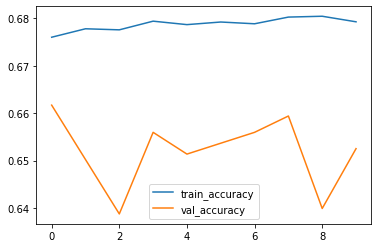

In [ ]:

plt.plot(transfer_history.history["accuracy"],label="train_accuracy")
plt.plot(transfer_history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()